In [1]:
import os, shutil
from keras.preprocessing import image
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/saumyasingh/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/saumyasingh/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/saumyasingh/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/saumyasingh/opt/ana

In [2]:
folders = os.listdir("Dataset/training_set")

In [3]:
classes = ["yes","no"]

In [4]:
print("Training Data")
for f in folders:
    path = "Dataset/training_set/"+f
    print(f+ " "+str(len(os.listdir(path))))

print("\n Validation Data") 
for f in folders:
    path = "Dataset/validation_set/"+f
    print(f+ " "+str(len(os.listdir(path))))

Training Data
no 132
yes 184

 Validation Data
no 66
yes 71


In [5]:
train_gen = ImageDataGenerator(rescale=1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.3,
    horizontal_flip = True
    )


val_gen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_gen.flow_from_directory(
    "Dataset/training_set/",
    target_size = (240,240),
    batch_size = 16,
    class_mode = 'sparse'
)

val_generator = val_gen.flow_from_directory(
    "Dataset/validation_set/",
    target_size = (240,240),
    batch_size = 16,
    class_mode = 'sparse'
)

Found 316 images belonging to 2 classes.
Found 137 images belonging to 2 classes.


In [6]:
for x,y in train_generator:
    print(x.shape)
    print(y.shape)
    break

(32, 240, 240, 3)
(32,)


In [7]:
input_shape = (240, 240, 3)
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

history = model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
epochs = 250
model.fit_generator(
    train_generator,
    steps_per_epoch= 316 // 16,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps= 137 // 16)

Epoch 1/250
19/19 [==============================] - 48s 3s/step - loss: 0.8861 - acc: 0.5417 - val_loss: 0.6848 - val_acc: 0.5794
Epoch 2/250
19/19 [==============================] - 37s 2s/step - loss: 0.6714 - acc: 0.6026 - val_loss: 0.6616 - val_acc: 0.6180
Epoch 3/250
19/19 [==============================] - 48s 3s/step - loss: 0.6735 - acc: 0.5867 - val_loss: 0.6857 - val_acc: 0.6052
Epoch 4/250
19/19 [==============================] - 41s 2s/step - loss: 0.6520 - acc: 0.6191 - val_loss: 0.7254 - val_acc: 0.5837
Epoch 5/250
19/19 [==============================] - 36s 2s/step - loss: 0.6683 - acc: 0.5894 - val_loss: 0.6680 - val_acc: 0.5536
Epoch 6/250
19/19 [==============================] - 40s 2s/step - loss: 0.6581 - acc: 0.5839 - val_loss: 0.6752 - val_acc: 0.6352
Epoch 7/250
19/19 [==============================] - 38s 2s/step - loss: 0.6396 - acc: 0.6026 - val_loss: 0.6964 - val_acc: 0.6052
Epoch 8/250
14/19 [=====================>........] - ETA: 9s - loss: 0.6375 - acc: 

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 238, 238, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 117, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 117, 117, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        1

In [9]:
history = model.history.history

In [10]:
for key in history.keys():
    print(key)

loss
acc
val_loss
val_acc


## Plot Loss & Accuracy

In [1]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss,label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

In [2]:
plot_metrics(history)

NameError: name 'history' is not defined

## RESULTS 

In [15]:
labels_dict = {'no':0, 'yes':1 }

### Confusion matrix for test Set

In [16]:
x=[]
y=[]
def load_data(path):
    X=[]
    Y=[]
    test = os.listdir(path)
    for i in test:  
        imgpath = path+"/"+i
        image = cv2.imread(imgpath)
        image = cv2.resize(image, dsize=(240, 240), interpolation=cv2.INTER_CUBIC)
        image = image / 255.
        X.append(image)
        if(path[-2:]=="no"):
            Y.append(0)
        else:
            Y.append(1)
    x.append(X)
    y.append(Y)

In [17]:
load_data("Dataset/test_set/no")
load_data("Dataset/test_set/yes")

In [18]:
y_test = y[0] + y[1]
x_test = x[0] + x[1]
x_test=np.array(x_test)
y_pred = model.predict(x_test)

In [19]:
for i in range(len(y_pred)):
    if(y_pred[i])<0.4:
        y_pred[i] = 0
    else:
        y_pred[i] = 1

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test, y_pred)

array([[10,  0],
       [ 1,  9]], dtype=int64)

### Draw Predictions

In [22]:
def draw_test(name,pred,input_in):
    BLACK=[0,0,0]
    if pred<=0.5:
        ans = "No Tumor."
    else:
        ans = "Tumor is present."
        
    prediction = ans + " Predicted Probability: " + str(pred)     
    expanded_image=cv2.copyMakeBorder(input_in,100,100,100,input_in.shape[0]+350,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image,prediction,(252,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0),2)    
    cv2.imshow(name,expanded_image) 

In [23]:
def predict(path_of_image):
    
    X=[]
    image=cv2.imread(path_of_image)
    image = cv2.resize(image, dsize=(240, 240), interpolation=cv2.INTER_CUBIC)
    image = image / 255.
    X.append(image)
    X=np.array(X)
    res = model.predict(X)
    print(res)
    draw_test("Prediction",res[0][0],image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()    

In [24]:
predict("Dataset/test_set/no/100.png")

[[0.03437266]]


In [25]:
predict("Dataset/test_set/yes/003.png")

[[0.5251705]]


### Confusion matrix for training Set

In [31]:
a=[]
b=[]
def load_data(path):
    X=[]
    Y=[]
    test = os.listdir(path)
    for i in test:  
        imgpath = path+"/"+i
        image = cv2.imread(imgpath)
        image = cv2.resize(image, dsize=(240, 240), interpolation=cv2.INTER_CUBIC)
        image = image / 255.
        X.append(image)
        if(path[-2:]=="no"):
            Y.append(0)
        else:
            Y.append(1)
    a.append(X)
    b.append(Y)

In [32]:
load_data("Dataset/training_set/no")
load_data("Dataset/training_set/yes")
y_train = b[0] + b[1]
x_train = a[0] + a[1]
x_train=np.array(x_train)
y_pred = model.predict(x_train)

In [45]:
for i in range(len(y_pred)):
    if(y_pred[i])<0.4:
        y_pred[i] = 0
    else:
        y_pred[i] = 1

In [55]:
cf_matrix = confusion_matrix(y_train, y_pred)

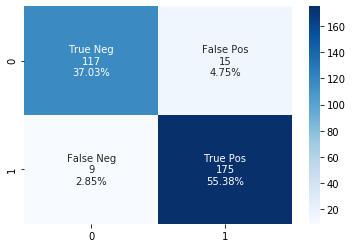

In [56]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [57]:
model.save('my_model.h5')

In [62]:
best_model = tf.keras.models.load_model('my_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
input_shape = (224, 224, 3)
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

history = model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])